# 6. Практика 1

## РАЗБИРАЕМ ПРАКТИЧЕСКИЙ ПРИМЕР RFM-АНАЛИЗА

Как проводить RFM-анализ, мы будем с вами разбирать сразу на практическом примере. 

Скачайте таблицу data.csv. >>> https://lms.skillfactory.ru/assets/courseware/v1/971a674c1d7b550ec5d82b4e98eb93b5/asset-v1:SkillFactory+DAPR-PA+14FEB2020+type@asset+block/data.csv

Один из самых удобных способов работы с такими данными — создание скриптов для Python.

Удобство заключается ещё и в том, что алгоритм для различных данных будет похож, поэтому даже если вы не очень сильны в Python, вы сможете осуществить такую работу.

### 1 Загружаем данные.

Первое, что нужно сделать — это загрузить данные, чтобы увидеть, на основании чего мы можем сделать градацию каждого признака.

1. Открываем Anaconda, заходим в Jupyter.
2. Добавляем скачанную таблицу в папку для анализа.
3. Создаем файл python.
4. Подключаем модуль, который позволит работать с данными, — это pandas. Импортируем данные, формируем датафрейм, с которым дальше можно продолжать работу.

In [1]:
import pandas as pd

orders = pd.read_csv('data.csv', sep=',')
orders

,order_date,order_id,customer,grand_total
0,9/7/11,CA-2011-100006,Dennis Kane,378
1,7/8/11,CA-2011-100090,Ed Braxton,699
2,3/14/11,CA-2011-100293,Neil Franz�sisch,91
3,1/29/11,CA-2011-100328,Jasper Cacioppo,4
4,4/8/11,CA-2011-100363,Jim Mitchum,21
...,...,...,...,...
5004,11/4/14,US-2014-168802,Jack O'Briant,18
5005,7/24/14,US-2014-169320,Lena Hernandez,171
5006,9/8/14,US-2014-169488,Allen Armold,57
5007,8/29/14,US-2014-169502,Matthew Grinstein,113


5. Выведем таблицы данных.

In [2]:
orders.head()

,order_date,order_id,customer,grand_total
0,9/7/11,CA-2011-100006,Dennis Kane,378
1,7/8/11,CA-2011-100090,Ed Braxton,699
2,3/14/11,CA-2011-100293,Neil Franz�sisch,91
3,1/29/11,CA-2011-100328,Jasper Cacioppo,4
4,4/8/11,CA-2011-100363,Jim Mitchum,21


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


6. Приведём данные к тому формату, с которым можно работать.

In [4]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['customer'] = orders['customer'].apply(str)

In [5]:
orders.head()

,order_date,order_id,customer,grand_total
0,2011-09-07,CA-2011-100006,Dennis Kane,378
1,2011-07-08,CA-2011-100090,Ed Braxton,699
2,2011-03-14,CA-2011-100293,Neil Franz�sisch,91
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4
4,2011-04-08,CA-2011-100363,Jim Mitchum,21


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   5009 non-null   datetime64[ns]
 1   order_id     5009 non-null   object        
 2   customer     5009 non-null   object        
 3   grand_total  5009 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 156.7+ KB


In [7]:
# Проверим, есть ли пустые поля
orders.isna().sum()

order_date     0
order_id       0
customer       0
grand_total    0
dtype: int64

7. Найдём самую позднюю покупку.

In [8]:
orders.max()

order_date     2014-12-31 00:00:00
order_id            US-2014-169551
customer        Zuschuss Donatelli
grand_total                  23661
dtype: object

### 2 Создаём таблицу RFM. 

Новизна вычисляется для определённого момента времени, а дата последнего заказа набора данных Tableau SuperStore — 31 декабря 2014 года. Именно эту дату мы будем использовать для расчёта новизны. Установите эту дату на текущий день и извлеките все заказы до вчерашнего дня.

In [9]:
import datetime as dt
last_date = dt.datetime(2014,12,31)
last_date

datetime.datetime(2014, 12, 31, 0, 0)

Чтобы создать таблицу, нам нужно проанализировать данные и сгруппировать их. Dataframe имеет метод .groupby(), который группирует данные по одному или нескольким столбцам.

##### Агрегация — это процесс превращения значений набора данных в одно значение.

Нам нужно найти все данные по каждому клиенту и их преобразовать особым образом, чтобы подсчитать три показателя RFM-анализа.

In [10]:
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (last_date - x.max()).days, 
                                           # Recency #Количество дней с последнего заказа
                                           'order_id': lambda x: len(x), # Frequency #Количество заказов
                                           'grand_total': lambda x: x.sum() # Monetary Value #Общая сумма по всем заказам
                                          })
rfmTable

,order_date,order_id,grand_total
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249
...,...,...,...
Xylona Preis,43,11,2375
Yana Sorensen,9,8,6721
Yoseph Carroll,4,5,5455


In [11]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   order_date   793 non-null    int64
 1   order_id     793 non-null    int64
 2   grand_total  793 non-null    int64
dtypes: int64(3)
memory usage: 24.8+ KB


In [12]:
rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   order_date   793 non-null    int32
 1   order_id     793 non-null    int64
 2   grand_total  793 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 21.7+ KB


In [13]:
rfmTable.rename(columns = {'order_date': 'recency',
                           'order_id': 'frequency',
                            'grand_total': 'monetary_value'}, inplace=True)
rfmTable

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249
...,...,...,...
Xylona Preis,43,11,2375
Yana Sorensen,9,8,6721
Yoseph Carroll,4,5,5455


### 3 Теперь мы можем сделать разбивку по квантилям.

Возьмём четыре параметра: 

* 0,25 0,5 0,75 и 1. 

В Python имеется встроенная функция, которая позволит выполнить эту задачу:

In [14]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,30.0,5.0,1145.0
0.50,75.0,6.0,2257.0
0.75,183.0,8.0,3784.0


Чтобы нам было удобнее работать дальше с этими данными, их необходимо преобразовать в словарь.

Теперь мы можем приступить к формированию таблицы сегментации:

In [15]:
rfmSegmentation = rfmTable
# rfmSegmentation

Создадим вспомогательную таблицу, в которую и будем вносить все дальнейшие изменения.

##### Здесь важно учесть, что показатель давности покупки будет лучше, если он меньше, поэтому создадим с вами две отдельные функции. Одна функция будет работать с показателем R, другая — с F и M.

In [16]:
# Arguments (x = value, p = recency, frequency, monetary_value, k (probably b! not k?) = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Arguments (x = value, p = recency, frequency, monetary_value, k (probably b! not k?) = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

- Далее применим эти функции для нахождения значений по показателям у каждого покупателя:

### - ментор курса использует слово "Quartile" ("R_Quartile"), я использую "Quantile", т.к. используем квантили

rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))

rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))

rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [17]:
rfmSegmentation['R_Quantile'] = rfmSegmentation['recency']
rfmSegmentation['R_Quantile']

customer
Aaron Bergman         415
Aaron Hawkins          12
Aaron Smayling         88
Adam Bellavance        54
Adam Hart              34
                     ... 
Xylona Preis           43
Yana Sorensen           9
Yoseph Carroll          4
Zuschuss Carroll       54
Zuschuss Donatelli    202
Name: R_Quantile, Length: 793, dtype: int32

In [18]:
rfmSegmentation['R_Quantile'] = rfmSegmentation['recency'].apply(RClass, args = ('recency', quantiles,))
rfmSegmentation['R_Quantile']

customer
Aaron Bergman         4
Aaron Hawkins         1
Aaron Smayling        3
Adam Bellavance       2
Adam Hart             2
                     ..
Xylona Preis          2
Yana Sorensen         1
Yoseph Carroll        1
Zuschuss Carroll      2
Zuschuss Donatelli    4
Name: R_Quantile, Length: 793, dtype: int64

In [19]:
rfmSegmentation['F_Quantile'] = rfmSegmentation['frequency']
rfmSegmentation['F_Quantile']

customer
Aaron Bergman          3
Aaron Hawkins          7
Aaron Smayling         7
Adam Bellavance        8
Adam Hart             10
                      ..
Xylona Preis          11
Yana Sorensen          8
Yoseph Carroll         5
Zuschuss Carroll      13
Zuschuss Donatelli     5
Name: F_Quantile, Length: 793, dtype: int64

In [20]:
rfmSegmentation['F_Quantile'] = rfmSegmentation['frequency'].apply(FMClass, args = ('frequency', quantiles,))
rfmSegmentation['F_Quantile']

customer
Aaron Bergman         4
Aaron Hawkins         2
Aaron Smayling        2
Adam Bellavance       2
Adam Hart             1
                     ..
Xylona Preis          1
Yana Sorensen         2
Yoseph Carroll        4
Zuschuss Carroll      1
Zuschuss Donatelli    4
Name: F_Quantile, Length: 793, dtype: int64

In [21]:
rfmSegmentation['M_Quantile'] = rfmSegmentation['monetary_value']
rfmSegmentation['M_Quantile']

customer
Aaron Bergman          887
Aaron Hawkins         1744
Aaron Smayling        3050
Adam Bellavance       7756
Adam Hart             3249
                      ... 
Xylona Preis          2375
Yana Sorensen         6721
Yoseph Carroll        5455
Zuschuss Carroll      8027
Zuschuss Donatelli    1494
Name: M_Quantile, Length: 793, dtype: int64

In [22]:
rfmSegmentation['M_Quantile'] = rfmSegmentation['monetary_value'].apply(FMClass, args = ('monetary_value', quantiles,))
rfmSegmentation['M_Quantile']

customer
Aaron Bergman         4
Aaron Hawkins         3
Aaron Smayling        2
Adam Bellavance       1
Adam Hart             2
                     ..
Xylona Preis          2
Yana Sorensen         1
Yoseph Carroll        1
Zuschuss Carroll      1
Zuschuss Donatelli    3
Name: M_Quantile, Length: 793, dtype: int64

In [23]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quantile,F_Quantile,M_Quantile
customer,,,,,,
Aaron Bergman,415,3,887,4,4,4
Aaron Hawkins,12,7,1744,1,2,3
Aaron Smayling,88,7,3050,3,2,2
Adam Bellavance,54,8,7756,2,2,1
Adam Hart,34,10,3249,2,1,2


>>> Теперь можем получить итоговое значение:

In [24]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quantile.map(str)\
                            + rfmSegmentation.F_Quantile.map(str)\
                            + rfmSegmentation.M_Quantile.map(str)
rfmSegmentation['RFMClass']

customer
Aaron Bergman         444
Aaron Hawkins         123
Aaron Smayling        322
Adam Bellavance       221
Adam Hart             212
                     ... 
Xylona Preis          212
Yana Sorensen         121
Yoseph Carroll        141
Zuschuss Carroll      211
Zuschuss Donatelli    443
Name: RFMClass, Length: 793, dtype: object

In [25]:
rfmSegmentation

,recency,frequency,monetary_value,R_Quantile,F_Quantile,M_Quantile,RFMClass
customer,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444
Aaron Hawkins,12,7,1744,1,2,3,123
Aaron Smayling,88,7,3050,3,2,2,322
Adam Bellavance,54,8,7756,2,2,1,221
Adam Hart,34,10,3249,2,1,2,212
...,...,...,...,...,...,...,...
Xylona Preis,43,11,2375,2,1,2,212
Yana Sorensen,9,8,6721,1,2,1,121
Yoseph Carroll,4,5,5455,1,4,1,141


In [26]:
# Например, смотрим самых выгодных покупателей:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quantile,F_Quantile,M_Quantile,RFMClass
customer,,,,,,,
Sanjit Engle,9,11,12210,1,1,1,111
John Lee,21,11,9801,1,1,1,111
Pete Kriz,9,12,8647,1,1,1,111
Harry Marie,2,10,8237,1,1,1,111
Lena Creighton,16,12,7661,1,1,1,111


Анализ проведён! Благодаря такому алгоритму можно осуществить сегментацию истории покупок клиентов на основе RFM-анализа.

In [27]:
# Задание 6.1
# Какой метод позволяет группировать элементы таблицы по одному или нескольким признакам?

# ПРАВИЛЬНЫЙ ОТВЕТ:
# groupby()  верно

### 7. Практика: анализ данных при помощи Python

In [28]:
rfm = rfmSegmentation
rfm

,recency,frequency,monetary_value,R_Quantile,F_Quantile,M_Quantile,RFMClass
customer,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444
Aaron Hawkins,12,7,1744,1,2,3,123
Aaron Smayling,88,7,3050,3,2,2,322
Adam Bellavance,54,8,7756,2,2,1,221
Adam Hart,34,10,3249,2,1,2,212
...,...,...,...,...,...,...,...
Xylona Preis,43,11,2375,2,1,2,212
Yana Sorensen,9,8,6721,1,2,1,121
Yoseph Carroll,4,5,5455,1,4,1,141


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='customer'>

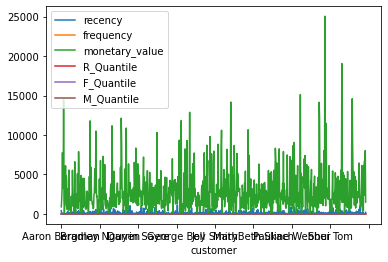

In [30]:
# Воспользуемся методом модуля pandas
rfm.plot()

In [31]:
sns.set()

<AxesSubplot:xlabel='customer'>

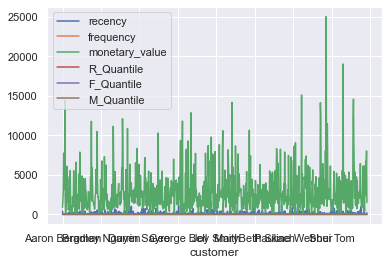

In [32]:
rfm.plot()

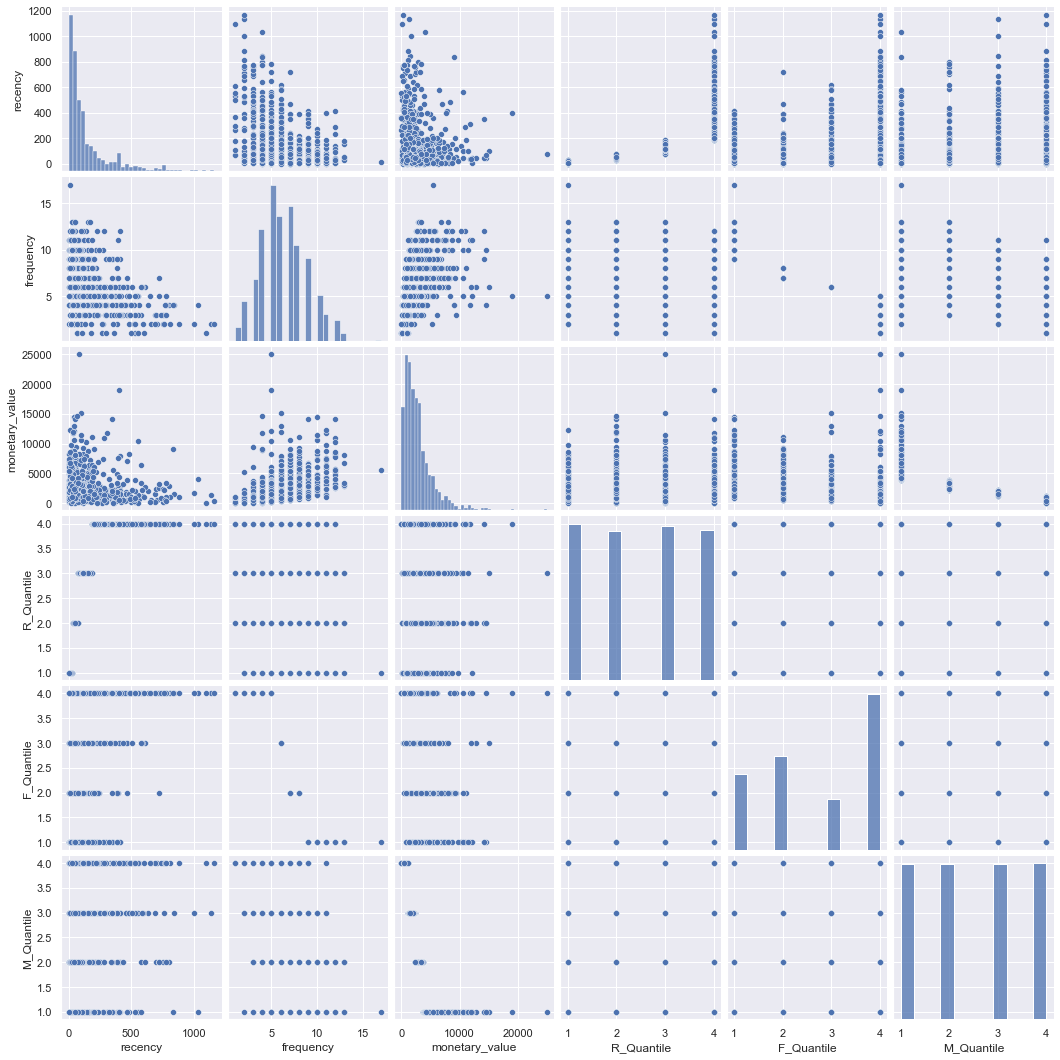

In [33]:
# метод pairplot модуля seaborn
sns.pairplot(rfm)

<BarContainer object of 4 artists>

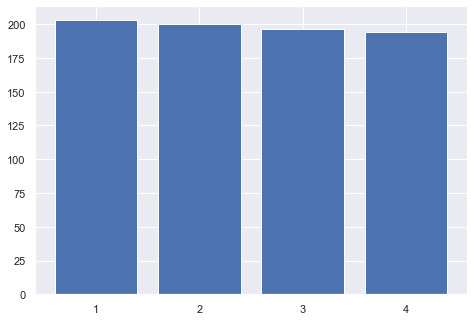

In [34]:
# Вертикальная диаграмма bar()
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 1])

axes1.bar(x=['1', '2', '3', '4'], height = rfm['R_Quantile'].value_counts())

<BarContainer object of 4 artists>

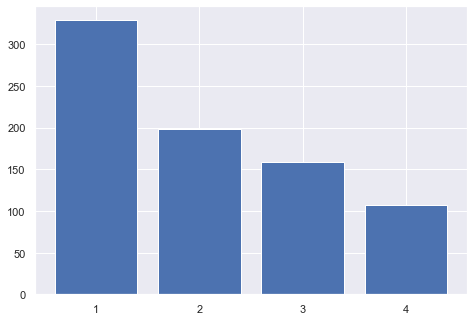

In [35]:
fig = plt.figure()
axes2 = fig.add_axes([0, 0, 1, 1])

axes2.bar(x=['1', '2', '3', '4'], height = rfm['F_Quantile'].value_counts())

<BarContainer object of 4 artists>

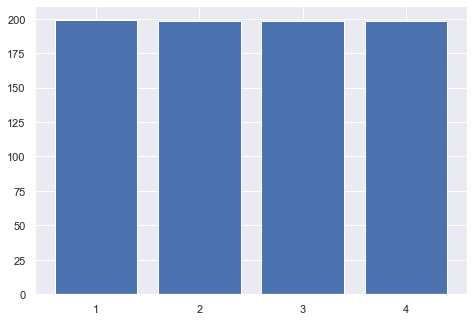

In [36]:
fig = plt.figure()
axes3 = fig.add_axes([0, 0, 1, 1])

axes3.bar(x=['1', '2', '3', '4'], height = rfm['M_Quantile'].value_counts())

In [37]:
rfm['M_Quantile'].value_counts()

4    199
3    198
2    198
1    198
Name: M_Quantile, dtype: int64

(array([67., 21., 21., 21., 19., 21., 19., 12., 27.,  5., 21., 21., 30.,
         5.,  2.,  5., 20.,  9., 31., 10., 31.,  0.,  1., 21.,  8., 37.,
         5.,  8.,  5.,  8.,  9., 21., 10., 15., 14., 19., 11., 18.,  2.,
        13., 10.,  8.,  0., 13., 12.,  9.,  5.,  5.,  4.,  6.,  2.,  2.,
         9., 11.,  7.,  5.,  4.,  7.,  3.,  8.,  6.,  5.,  4.,  5.]),
 array([ 0.      ,  0.953125,  1.90625 ,  2.859375,  3.8125  ,  4.765625,
         5.71875 ,  6.671875,  7.625   ,  8.578125,  9.53125 , 10.484375,
        11.4375  , 12.390625, 13.34375 , 14.296875, 15.25    , 16.203125,
        17.15625 , 18.109375, 19.0625  , 20.015625, 20.96875 , 21.921875,
        22.875   , 23.828125, 24.78125 , 25.734375, 26.6875  , 27.640625,
        28.59375 , 29.546875, 30.5     , 31.453125, 32.40625 , 33.359375,
        34.3125  , 35.265625, 36.21875 , 37.171875, 38.125   , 39.078125,
        40.03125 , 40.984375, 41.9375  , 42.890625, 43.84375 , 44.796875,
        45.75    , 46.703125, 47.65625 , 48.60

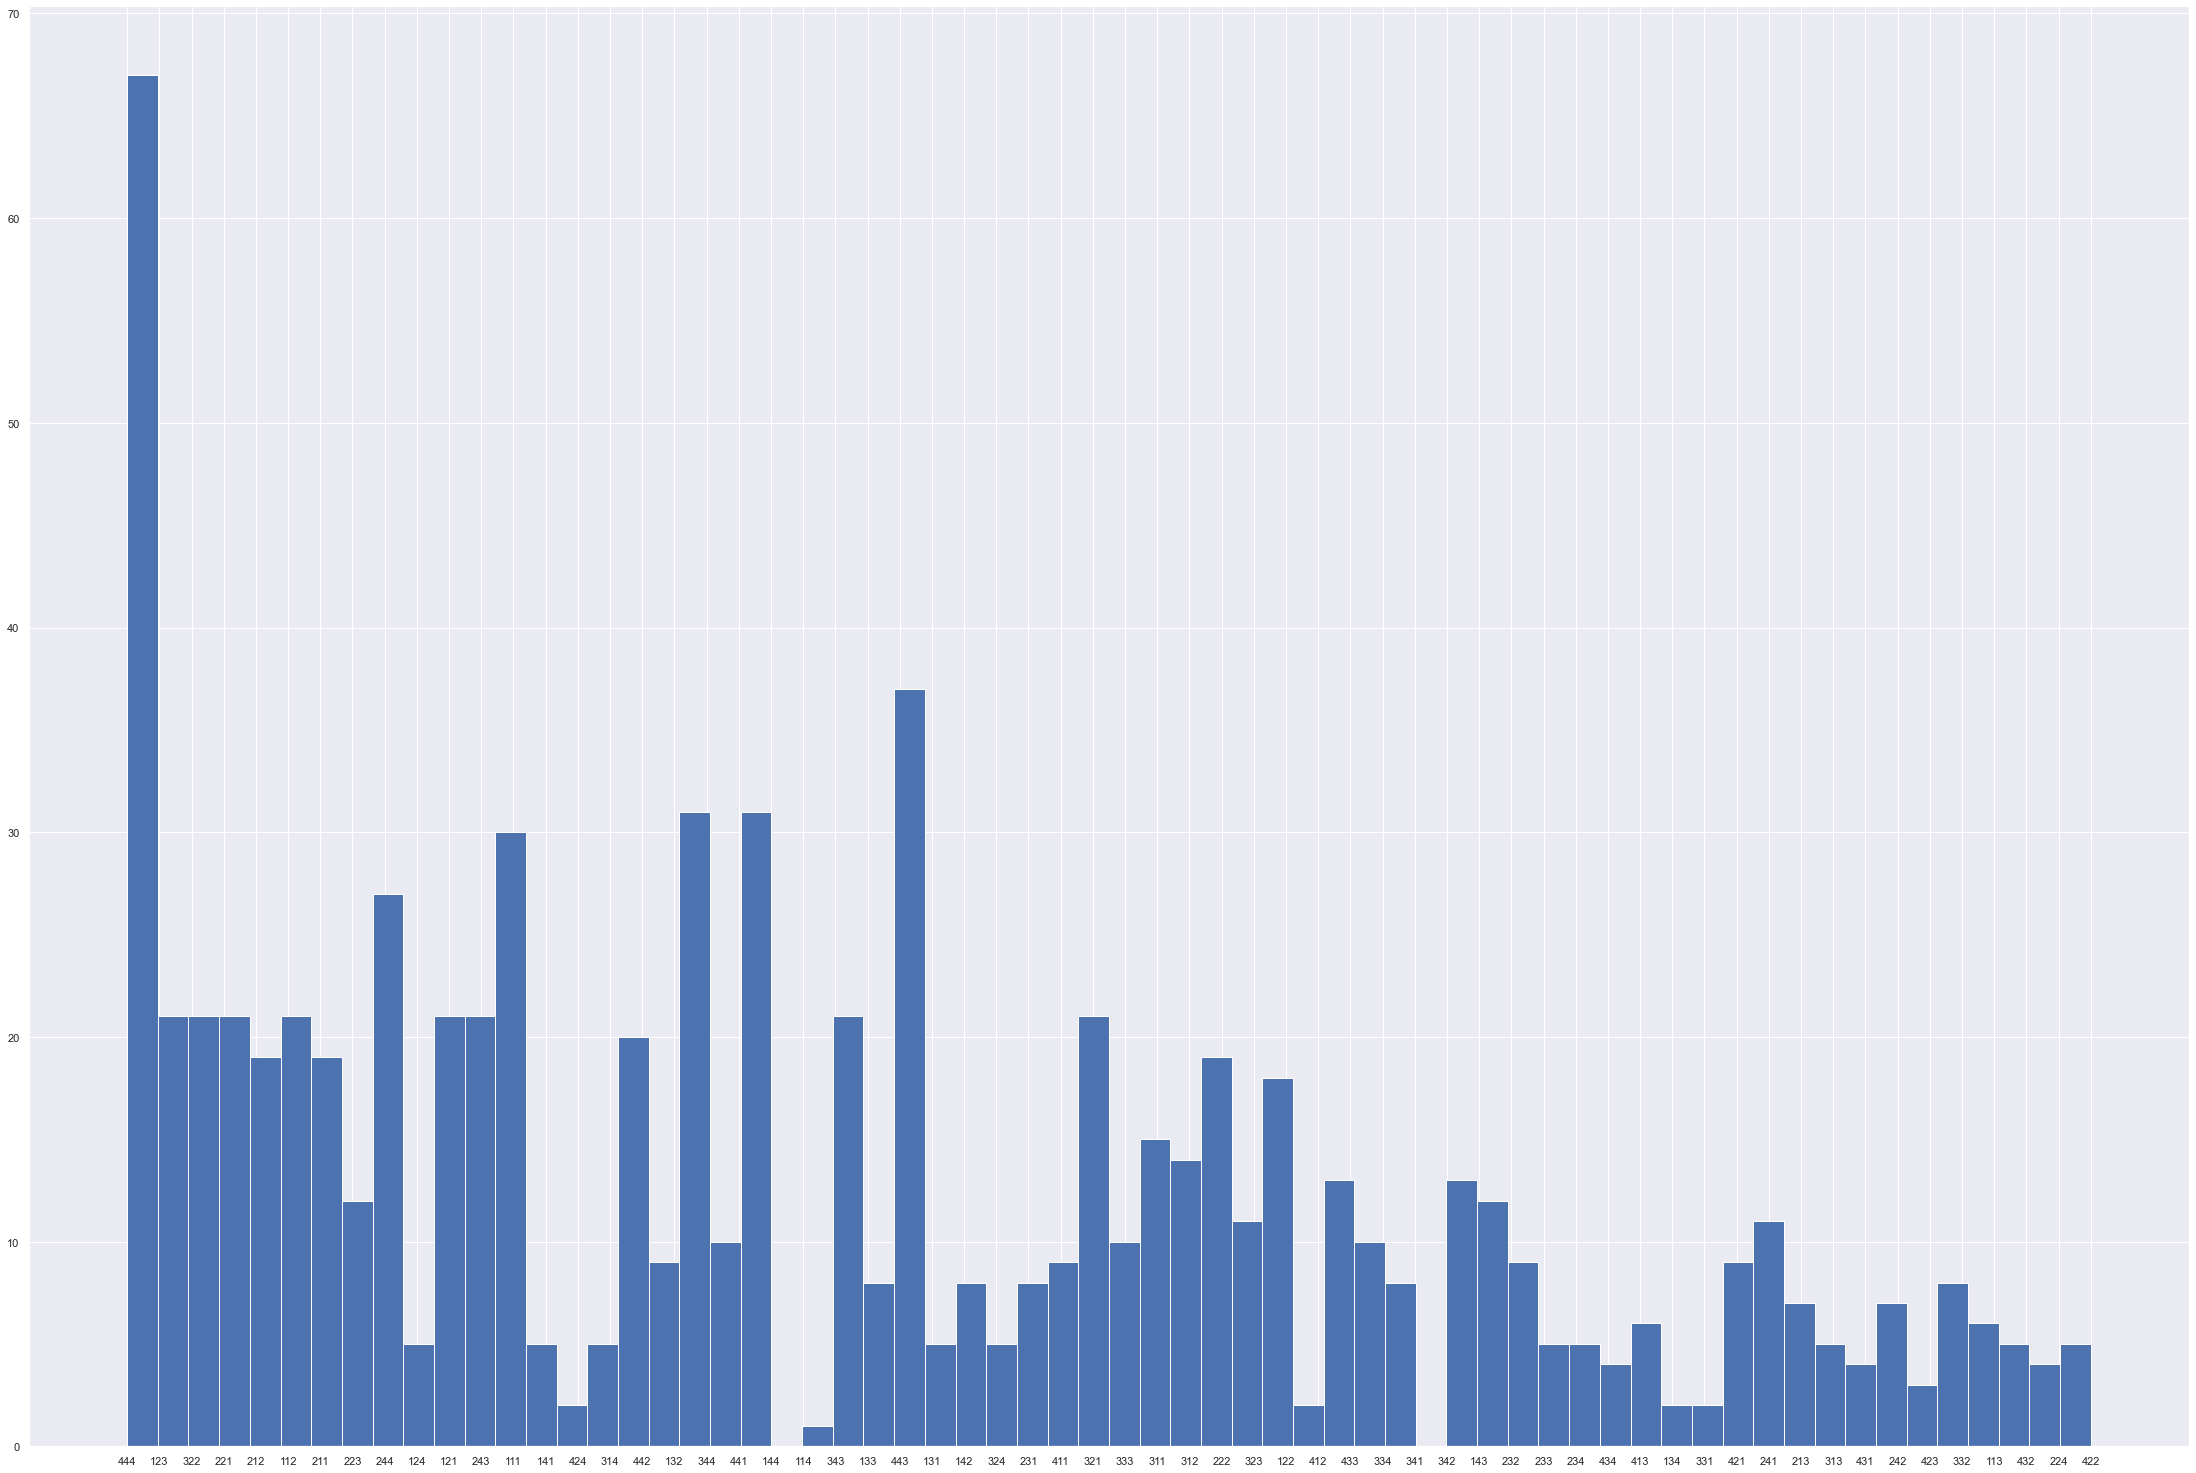

In [38]:
# Создание графика количества клиентов в каждом из сегментов R, F, M

fig = plt.figure()
axes = fig.add_axes([0, 0, 5, 5])
axes.hist(rfm['RFMClass'], bins = 64)

Text(0, 0.5, 'monetary_value')

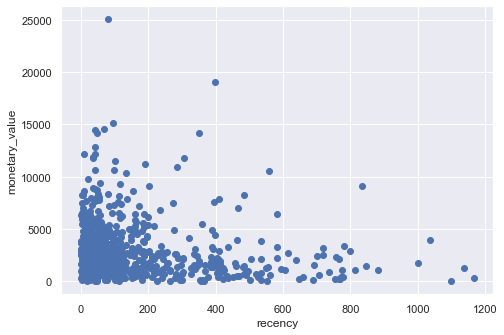

In [39]:
# Рисуем график зависимости давности покупки от суммы потраченных средств

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=rfm['recency'], y = rfm['monetary_value'])
axes.set_xlabel('recency')
axes.set_ylabel('monetary_value')

In [40]:
# Установка пакета выполняется только один раз!
!pip install plotly

In [41]:
# Установка пакета выполняется только один раз!
!pip install cufflinks

In [42]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [43]:
init_notebook_mode(connected = True)
cf.go_offline()

In [44]:
rfm.iplot(kind = 'scatter', x = 'recency', y = 'monetary_value', mode = 'markers')

### Открываем и преобразовываем таблицу 'RFM201810'

In [45]:
rfm2018 = pd.read_csv('RFM201810.csv', low_memory=False)
rfm2018

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2018-10-01 00:00:00.000,1716.00
1,C0011810010017,13233933,2018-10-01 00:00:00.000,1489.74
2,C0011810010020,99057968,2018-10-01 00:00:00.000,151.47
3,C0011810010021,80007276,2018-10-01 00:00:00.000,146.72
4,C0011810010024,13164076,2018-10-01 00:00:00.000,104.00
...,...,...,...,...
332725,S0081810310459,14092500,2018-10-31 00:00:00.000,3801.87
332726,S0081810310461,99065678,2018-10-31 00:00:00.000,5769.88
332727,S0081810310462,19029918,2018-10-31 00:00:00.000,736.88
332728,S0081810310463,13020033,2018-10-31 00:00:00.000,1475.20


In [46]:
rfm2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     332730 non-null  object 
 1   CustomerCode  332730 non-null  object 
 2   InvoiceDate   332730 non-null  object 
 3   Amount        332730 non-null  float64
dtypes: float64(1), object(3)
memory usage: 10.2+ MB


In [47]:
# Приведём данные к тому формату, с которым можно работать.

rfm2018['InvoiceDate'] = pd.to_datetime(rfm2018['InvoiceDate'])
rfm2018['CustomerCode'] = rfm2018['CustomerCode'].apply(str)

In [48]:
rfm2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     332730 non-null  object        
 1   CustomerCode  332730 non-null  object        
 2   InvoiceDate   332730 non-null  datetime64[ns]
 3   Amount        332730 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.2+ MB


In [49]:
# Проверим, есть ли пустые поля:
rfm2018.isna().sum()

InvoiceNo       0
CustomerCode    0
InvoiceDate     0
Amount          0
dtype: int64

In [50]:
# Смотрим последнюю дату - InvoiceDate:
rfm2018.max()

InvoiceNo            S0081810310466
CustomerCode               99099972
InvoiceDate     2018-10-31 00:00:00
Amount                       131874
dtype: object

### Создаём таблицу RFM2018

In [51]:
# "Именно эту дату мы будем использовать для расчёта новизны. 
# Установите эту дату на текущий день и извлеките все заказы до вчерашнего дня." - См. выше "Создаём таблицу RFM"
import datetime as dt
last_date2018 = dt.datetime(2018,10,31)
last_date2018

datetime.datetime(2018, 10, 31, 0, 0)

In [52]:
rfmtable2018 = rfm2018.groupby('CustomerCode').agg({'InvoiceDate': lambda x: (last_date2018 - x.max()).days,
                                                    # Recency #Количество дней с последнего заказа
                                                   'CustomerCode': lambda x: len(x), # Frequency #Количество заказов
                                                    'Amount': lambda x: x.sum() # Monetary Value #Общая сумма по всем заказам
                                                   })
rfmtable2018

,InvoiceDate,CustomerCode,Amount
CustomerCode,,,
02213019,7,2,3770.76
02213042,23,3,9685.48
02213071,8,2,833.00
02213081,10,1,276.98
02213082,11,2,1215.96
...,...,...,...
99099927,11,1,961.10
99099936,1,1,1521.78
99099959,9,2,1444.56


In [53]:
rfmtable2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123593 entries, 02213019 to 99099972
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceDate   123593 non-null  int64  
 1   CustomerCode  123593 non-null  int64  
 2   Amount        123593 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.8+ MB


In [54]:
rfmtable2018['InvoiceDate'] = rfmtable2018['InvoiceDate'].astype(int)

In [55]:
rfmtable2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123593 entries, 02213019 to 99099972
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceDate   123593 non-null  int32  
 1   CustomerCode  123593 non-null  int64  
 2   Amount        123593 non-null  float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.3+ MB


In [56]:
# Переименовываем названия столбцов:
rfmtable2018.rename(columns = {'InvoiceDate': 'recency',
                               'CustomerCode': 'frequency',
                               'Amount': 'monetary_value'}, inplace = True)
rfmtable2018

,recency,frequency,monetary_value
CustomerCode,,,
02213019,7,2,3770.76
02213042,23,3,9685.48
02213071,8,2,833.00
02213081,10,1,276.98
02213082,11,2,1215.96
...,...,...,...
99099927,11,1,961.10
99099936,1,1,1521.78
99099959,9,2,1444.56


### Теперь, делаем разбивку по квантилям.

Возьмём четыре параметра: 
* 0,25 0,5 0,75 и 1. 
В Python имеется встроенная функция, которая позволит выполнить эту задачу:

In [57]:
quantiles2018 = rfmtable2018.quantile(q = [0.25,0.5,0.75])
quantiles2018

,recency,frequency,monetary_value
0.25,3.0,1.0,765.08
0.50,9.0,2.0,1836.30
0.75,17.0,3.0,4014.01


"Чтобы нам было удобнее работать дальше с этими данными, их необходимо преобразовать в словарь.
Теперь мы можем приступить к формированию таблицы сегментации:" - См. пример выше...

In [58]:
rfmSegmentation2018 = rfmtable2018
rfmSegmentation2018

,recency,frequency,monetary_value
CustomerCode,,,
02213019,7,2,3770.76
02213042,23,3,9685.48
02213071,8,2,833.00
02213081,10,1,276.98
02213082,11,2,1215.96
...,...,...,...
99099927,11,1,961.10
99099936,1,1,1521.78
99099959,9,2,1444.56


"Создадим вспомогательную таблицу, в которую и будем вносить все дальнейшие изменения.

Здесь важно учесть, что показатель давности покупки будет лучше, если он меньше, поэтому создадим с вами две отдельные функции. Одна функция будет работать с показателем R, другая — с F и M." - См. пример выше...

In [59]:
# Arguments (x = value, p = recency, frequency, monetary_value, k (probably b! not k?) = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Arguments (x = value, p = recency, frequency, monetary_value, k (probably b! not k?) = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

"Далее применим эти функции для нахождения значений по показателям у каждого покупателя: - См. пример выше...
- в 1-м примере, ментор использует "Quartile" ("R_Quartile"), я использую "Quantile", т.к. используем квантили"

In [60]:
rfmSegmentation2018['R_Quantile'] = rfmSegmentation2018['recency'].apply(RClass, args=('recency',quantiles,))

rfmSegmentation2018['F_Quantile'] = rfmSegmentation2018['frequency'].apply(FMClass, args=('frequency',quantiles,))

rfmSegmentation2018['M_Quantile'] = rfmSegmentation2018['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [61]:
rfmSegmentation2018

,recency,frequency,monetary_value,R_Quantile,F_Quantile,M_Quantile
CustomerCode,,,,,,
02213019,7,2,3770.76,1,4,2
02213042,23,3,9685.48,1,4,1
02213071,8,2,833.00,1,4,4
02213081,10,1,276.98,1,4,4
02213082,11,2,1215.96,1,4,3
...,...,...,...,...,...,...
99099927,11,1,961.10,1,4,4
99099936,1,1,1521.78,1,4,3
99099959,9,2,1444.56,1,4,3


In [62]:
# Получаем итоговый столбец:

rfmSegmentation2018['RFMClass'] = rfmSegmentation2018.R_Quantile.map(str) +\
                                  rfmSegmentation2018.F_Quantile.map(str) +\
                                  rfmSegmentation2018.M_Quantile.map(str)
rfmSegmentation2018

,recency,frequency,monetary_value,R_Quantile,F_Quantile,M_Quantile,RFMClass
CustomerCode,,,,,,,
02213019,7,2,3770.76,1,4,2,142
02213042,23,3,9685.48,1,4,1,141
02213071,8,2,833.00,1,4,4,144
02213081,10,1,276.98,1,4,4,144
02213082,11,2,1215.96,1,4,3,143
...,...,...,...,...,...,...,...
99099927,11,1,961.10,1,4,4,144
99099936,1,1,1521.78,1,4,3,143
99099959,9,2,1444.56,1,4,3,143


##### Задание 7.1
Постройте график с помощью встроенного в pandas метода plot(), который покажет, сколько человек находится в каждом из сегментов (сегмент — это, например, 111, 121, 444 и т. д.). В ответ напишите код Python, который позволит это выполнить. Назовем нашу таблицу rfm.

<AxesSubplot:>

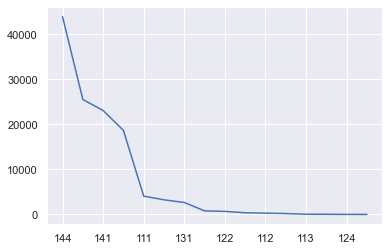

In [63]:
rfmSegmentation2018['RFMClass'].value_counts().plot()

##### Задание 7.2
Вспомните, какие дополнительные модули нужны для построения графика iplot(). Постройте график этого вида, который покажет зависимость между потраченной суммой и давностью покупки. Найдите давность покупки, когда была потрачена максимальная сумма. В ответе укажите через запятую без пробелов два числа: давность и сумму, округлите. Например, 9,1000000.

In [64]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

# rfmSegmentation2018.iplot(kind = 'scatter', x = 'recency', y = 'monetary_value', mode = 'markers')

##### Задание 7.3
Постройте столбчатую диаграмму (метод bar()) для визуального распределения клиентов по показателям 1,2,3 и 4 для M_Quartile. Какое утверждение неверно?

In [68]:
# ПРАВИЛЬНЫЙ ОТВЕТ:
# Нет ни одного клиента, у которого F = 3                   верно
# Количество клиентов с F=1, 2, 3 и 4 примерно одинаковое
# Больше клиентов компании тратит мало

axesM.bar(x=['1', '2', '3', '4'], height = rfmSegmentation2018['M_Quantile'].value_counts())

NameError: name 'axesM' is not defined